Import Libraries 

In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
df = pd.read_csv('../data/body_dimensions.csv')
dimensions = df.copy()
required_columns = ['sex', 'age', 'hgt', 'wgt', 'hip_gi', 'wai_gi']
dimensions = dimensions[required_columns].rename(columns={
    'hgt':"height(cm)",
    'wgt':"weight(kg)",
    'hip_gi': "hip_size(cm)",
    'wai_gi': "waist_size(cm)"
})
dimensions.head(5)


,sex,age,height(cm),weight(kg),hip_size(cm),waist_size(cm)
0,1,21,174.0,65.6,93.5,71.5
1,1,23,175.3,71.8,94.8,79.0
2,1,28,193.5,80.7,95.0,83.2
3,1,23,186.5,72.6,94.0,77.8
4,1,22,187.2,78.8,98.5,80.0


*sex* is a categorical vector. 1 for male and 0 for female.

I'll prefer to have the height measured in m. 

In [79]:
dimensions['height(m)'] = dimensions['height(cm)'] / 100
required_columns = ['sex', 'age', 'height(m)', 'weight(kg)', 'hip_size(cm)','waist_size(cm)']
dimensions_new = dimensions[required_columns]
dimensions_new.head(5)

,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
0,1,21,1.740,65.6,93.5,71.5
1,1,23,1.753,71.8,94.8,79.0
2,1,28,1.935,80.7,95.0,83.2
3,1,23,1.865,72.6,94.0,77.8
4,1,22,1.872,78.8,98.5,80.0


**Statistical Information**

In [4]:
dimensions_new.head()

,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
0,1,21,1.740,65.6,93.5,71.5
1,1,23,1.753,71.8,94.8,79.0
2,1,28,1.935,80.7,95.0,83.2
3,1,23,1.865,72.6,94.0,77.8
4,1,22,1.872,78.8,98.5,80.0


In [5]:
#show info
dimensions_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             507 non-null    int64  
 1   age             507 non-null    int64  
 2   height(m)       507 non-null    float64
 3   weight(kg)      507 non-null    float64
 4   hip_size(cm)    507 non-null    float64
 5   waist_size(cm)  507 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.9 KB


In [6]:
# show statistics 
dimensions_new.describe()


,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.487179,30.181460,1.711438,69.147535,96.680868,76.979487
std,0.500329,9.608472,0.094072,13.345762,6.680623,11.012688
min,0.000000,18.000000,1.472000,42.000000,78.800000,57.900000
25%,0.000000,23.000000,1.638000,58.400000,92.000000,68.000000
50%,0.000000,27.000000,1.703000,68.200000,96.000000,75.800000
75%,1.000000,36.000000,1.778000,78.850000,101.000000,84.500000
max,1.000000,67.000000,1.981000,116.400000,128.300000,113.200000


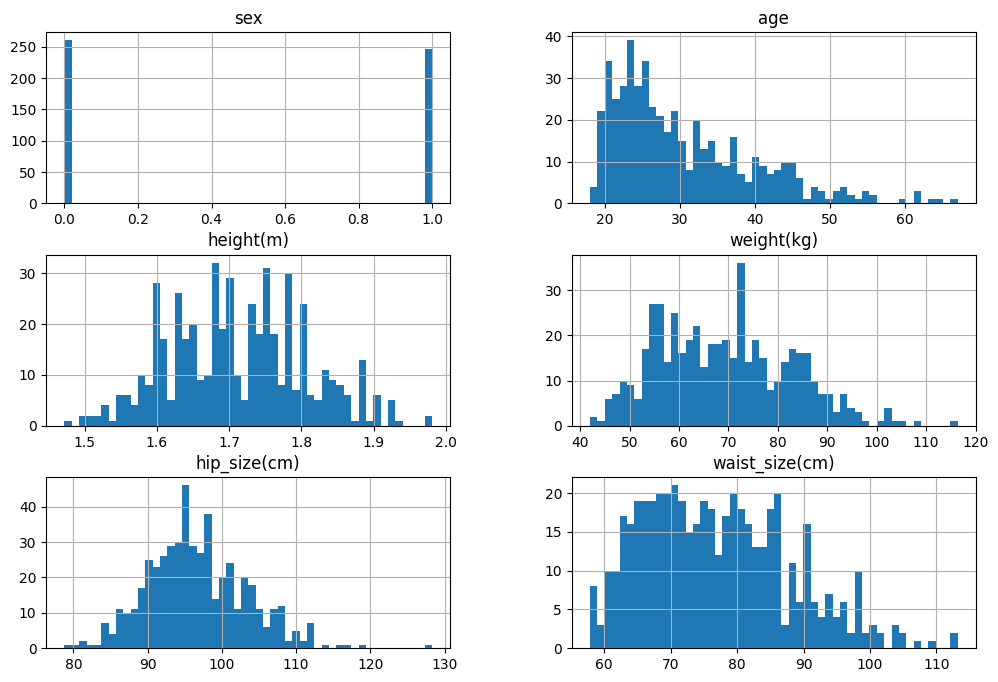

In [7]:
# Understanding the Distribution of the dataset 
dimensions_new.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
#save the clean data set in the data directory. 
dimensions_new.to_csv("../data/dimensions.csv")